In [15]:
!pip install paddlepaddle
!pip install "paddleocr>=2.0.1"
!pip install fer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import pandas as pd

In [23]:
from fer import FER
import cv2

def find_emotion(image):

  mood_to_bin = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}

  img = cv2.imread(image)
  detector = FER()
  emotion = detector.detect_emotions(img)

  # for idx in range(len(emotion)):
  #   res = emotion[idx]
  #   for line in res:
  #       print(line)


  # from PIL import Image
  # result = emotion[0]
  # image = Image.open(image).convert('RGB')
  # im_show = draw_ocr(image, result, txts=None, scores=None)
  # im_show = Image.fromarray(im_show)
  # im_show.show()

  top = emotion[0]["emotions"]
  top = dict(sorted(top.items(), key=lambda item: item[1]))
  top = list(top.items())[-1]
  return mood_to_bin[top[0]]

def rec_song(result):
  mood_music = pd.read_csv("./data_moods (1).csv")
  mood_music = mood_music[['name','artist','mood']]
  mood_music.head()
  if(result[0]==0 or result[0]==1 or result[0]==2 ):
    #for angery,disgust,fear
    filter1=mood_music['mood']=='Calm'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
  if(result[0]==3 or result[0]==4):
      #for happy, neutral
      filter1=mood_music['mood']=='Happy'
      f1=mood_music.where(filter1)
      f1=f1.dropna()
      f2 =f1.sample(n=5)
      f2.reset_index(inplace=True)
      display(f2)
  if(result[0]==5):
        #for Sad
      filter1=mood_music['mood']=='Sad'
      f1=mood_music.where(filter1)
      f1=f1.dropna()
      f2 =f1.sample(n=5)
      f2.reset_index(inplace=True)
      display(f2)
  if(result[0]==6):
      #for surprise
      filter1=mood_music['mood']=='Energetic'
      f1=mood_music.where(filter1)
      f1=f1.dropna()
      f2 =f1.sample(n=5)
      f2.reset_index(inplace=True)
      return (f2)

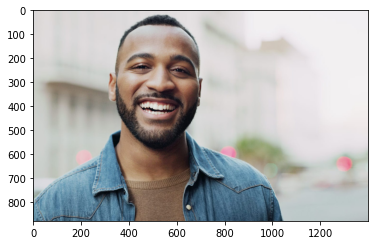

,index,name,artist,mood
0,456,Roses,OutKast,Happy
1,103,Come On Eileen,Dexys Midnight Runners,Happy
2,207,Geno - 2000 Remaster,Dexys Midnight Runners,Happy
3,124,Dance Little Sister,Terence Trent D'Arby,Happy
4,617,War,Kensington,Happy


In [25]:
import matplotlib.pyplot as plt

image = plt.imread("./image/05-12-21-happy-people.jpg")
plt.imshow(image)
plt.show()

rec_song([find_emotion("./image/05-12-21-happy-people.jpg")])

# Medicine identifier 💊

Allows the user to find and record the given medicine from an image of the cover

In [ ]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os
from PIL import Image

ocr = PaddleOCR(use_angle_cls=True)
def find_text(image_path):
  result = ocr.ocr(image_path)
  for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

# draw result

  result = result[0]
  image = Image.open(image_path).convert('RGB')
  boxes = [line[0] for line in result]
  txts = [line[1][0] for line in result]
  scores = [line[1][1] for line in result]
  im_show = draw_ocr(image, boxes, txts, scores, font_path='/fonts/simfang.ttf?raw=true')
  im_show = Image.fromarray(im_show)
  return result[0][-1][0], im_show

[2022/12/23 02:09:42] ppocr DEBUG: dt_boxes num : 11, elapse : 0.12804555892944336
[2022/12/23 02:09:43] ppocr DEBUG: cls num  : 11, elapse : 0.09834551811218262
[2022/12/23 02:09:44] ppocr DEBUG: rec_res num  : 11, elapse : 1.2404694557189941
[[[5.0, 5.0], [126.0, 33.0], [122.0, 50.0], [1.0, 21.0]], ('Paracetamol', 0.9530448317527771)]
[[[3.0, 25.0], [120.0, 53.0], [116.0, 68.0], [0.0, 40.0]], ('(Acetaminophen)', 0.9678261876106262)]
[[[21.0, 50.0], [91.0, 70.0], [84.0, 91.0], [14.0, 71.0]], ('500mg', 0.9965807795524597)]
[[[5.0, 109.0], [77.0, 127.0], [74.0, 141.0], [1.0, 122.0]], ('Fororal use', 0.9244081377983093)]
[[[133.0, 141.0], [162.0, 146.0], [158.0, 167.0], [129.0, 163.0]], ('20', 0.9992607235908508)]
[[[301.0, 139.0], [322.0, 131.0], [372.0, 242.0], [350.0, 251.0]], ('HEMATOLOGY', 0.9538606405258179)]
[[[129.0, 160.0], [159.0, 166.0], [156.0, 178.0], [126.0, 171.0]], ('tablets', 0.9534245729446411)]
[[[121.0, 264.0], [272.0, 264.0], [272.0, 277.0], [121.0, 277.0]], ('shutte

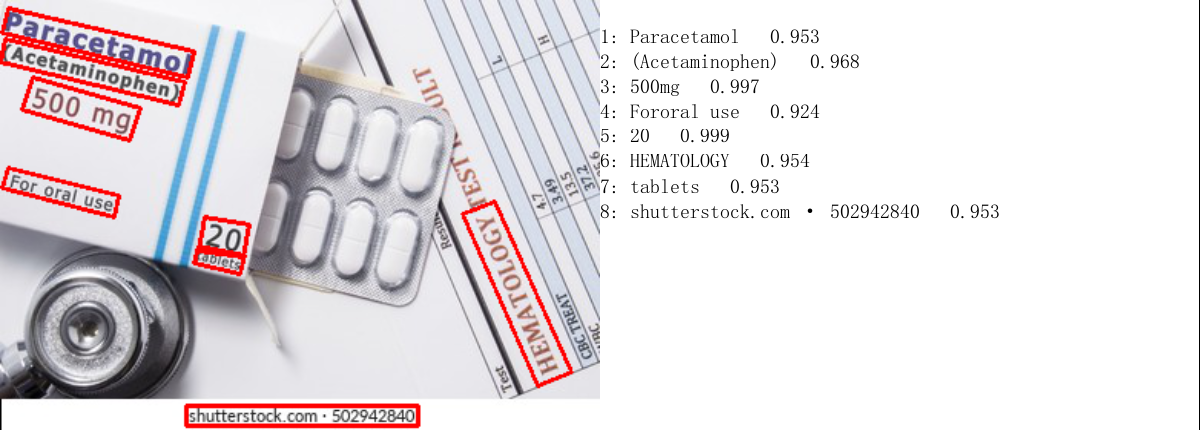

In [39]:
drug, image = find_text("/image/open-paper-packaging-box-international-260nw-502942840.jpg")
print(f"The drug is {drug}")
image